### **numpy**, **SciPy stats** and **matplotlib** modules  
The **numpy** and **SciPy stats** and **matplotlib** modules have many mathematical  
and statistical methods used in **Data Science** and **Machine Learning**  

Given a collection of numeric values, such as a list, we can compute:

- **mean** - the average value (numpy)
- **median** - the mid-point value (numpy)
- **mode** - the most frequent value (stats)
- **standard deviation** - how far a value is from the mean (numpy)
- **variance** - standard deviation squared (numpy)

We can also generate numpy arrays of *random* numeric values.
- **random.uniform** generates random, *uniform* (even) distribution of values
- **random.normal** generates random, *normal* (bell curve shaped) distribution of values

**matplotlib is for plotting data**
- **histogram** shows **frequency distribution** of values: **plt.hist()**   
random **uniform** and **normal** distributions can be plotted as a histogram. (matplotlib)
- **scatter plot** shows  individual points in **(x,y) space**, as dots:  **plt.scatter()**
- **line plot** shows lines in **(x,y) space**: **plt.plot()**
- **linear regression** shows **best-fit / trend** lines.  
given **x** or **y**, we can *predict* the other value by plotting it on the regression line.

In [363]:
# 1. connect to Google Drive


In [364]:
# install libraries if needed:
%pip install matplotlib scipy pandas IPython


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
# 2. import libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from IPython.display import Image
from scipy import stats

In [366]:
# 3. set the base URL (the path that is the same for
# all items loaded from Google Drive)

In [367]:
car_df = pd.read_csv('../csv/Car_sales.csv')

In [368]:
print(car_df.shape) # (157, 16)
car_df.head() # rows 1-5

(157, 16)


,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [369]:
# loc vs iloc: loc takes col names and index names
# with loc end name is NOT exclusive -- it is INCLUSIVE
# using loc, get the first 3 rows first 3 cols (3x3 in the upper left corner)
car_df.loc[:2, "Manufacturer":"Sales_in_thousands"]

,Manufacturer,Model,Sales_in_thousands
0,Acura,Integra,16.919
1,Acura,TL,39.384
2,Acura,CL,14.114


In [370]:
# challenge : same as above, but with iloc instead of loc
car_df.iloc[:3, :3]

,Manufacturer,Model,Sales_in_thousands
0,Acura,Integra,16.919
1,Acura,TL,39.384
2,Acura,CL,14.114


In [371]:
# challenge : same as above, with both .loc and .iloc versions
# BUT get the lower RIGHT 3x3
# first the .loc version:
car_df.loc[154:156, "Fuel_efficiency":"Power_perf_factor"]

,Fuel_efficiency,Latest_Launch,Power_perf_factor
154,25.0,6/25/2011,71.155978
155,23.0,4/26/2011,101.623357
156,24.0,11/14/2011,85.735655


In [372]:
# challenge : same as above, with both .loc and .iloc versions
# BUT get the lower RIGHT 3x3
# then the .iloc version:
car_df.iloc[-3:, -3:]

,Fuel_efficiency,Latest_Launch,Power_perf_factor
154,25.0,6/25/2011,71.155978
155,23.0,4/26/2011,101.623357
156,24.0,11/14/2011,85.735655


In [373]:
# make a list of just the column names
car_df_cols_list = list(car_df.columns)
print('car_df_cols_list:\n', car_df_cols_list)
# get the length (num rows)
num_rows = len(car_df.index)
print('num_rows:', num_rows)

car_df_cols_list:
 ['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value', 'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor']
num_rows: 157


In [374]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [375]:
# a bit more dataframe practice:
# drop, move and rename cols
car_df.drop(columns="__year_resale_value", inplace=True)
# a.) drop "__year_resale_value" (missing a lot of data)
# "__year_resale_value"

In [376]:
print(car_df.shape) # (157, 15)
car_df

(157, 15)


,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [377]:
car_df_cols_list = list(car_df.columns)
print('car_df_cols_list:\n',car_df_cols_list)

# b.) move 'Wheelbase' to be between 'Length and 'Curb_weight'
# get the index of 'Curb_weight' col so that we know where to insert 'Wheelbase'; list.index(item) returns the numeric position (index) of the item in the list
curb_wt_index = car_df_cols_list.index('Curb_weight')
print('curb_wt_index:',curb_wt_index) # 10

car_df_cols_list:
 ['Manufacturer', 'Model', 'Sales_in_thousands', 'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor']
curb_wt_index: 10


In [378]:
# popped_col = df.pop(col_name) to pop (remove) the col that we want to move
popped_wheelbase_col = car_df.pop('Wheelbase')
print('popped_wheelbase_col:\n',popped_wheelbase_col[:5])

popped_wheelbase_col:
 0    101.2
1    108.1
2    106.9
3    114.6
4    102.6
Name: Wheelbase, dtype: float64


In [379]:
# get fresh values since we have removed a column:
car_df_cols_list = list(car_df.columns)
curb_wt_index = car_df_cols_list.index('Curb_weight')

In [380]:
# insert the popped wheelbase series as col data at new index (10):
# df.insert(index,col_name,data)
# "Wheelbase"
car_df.insert(curb_wt_index,"Wheelbase",popped_wheelbase_col)

In [381]:
print(car_df.shape)
car_df.head()

(157, 15)


,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Width,Length,Wheelbase,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,Passenger,21.50,1.8,140.0,67.3,172.4,101.2,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,Passenger,28.40,3.2,225.0,70.3,192.9,108.1,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,Passenger,NaN,3.2,225.0,70.6,192.0,106.9,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,Passenger,42.00,3.5,210.0,71.4,196.6,114.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,Passenger,23.99,1.8,150.0,68.2,178.0,102.6,2.998,16.4,27.0,10/8/2011,62.777639


In [382]:
# c.) rename 'Power_perf_factor' as 'Power_Performance'
# 'Power_perf_factor'
car_df.rename(columns={'Power_perf_factor':'Power_Performance'}, inplace=True)

In [383]:
print(car_df.shape)
car_df.head()

(157, 15)


,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Width,Length,Wheelbase,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_Performance
0,Acura,Integra,16.919,Passenger,21.50,1.8,140.0,67.3,172.4,101.2,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,Passenger,28.40,3.2,225.0,70.3,192.9,108.1,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,Passenger,NaN,3.2,225.0,70.6,192.0,106.9,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,Passenger,42.00,3.5,210.0,71.4,196.6,114.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,Passenger,23.99,1.8,150.0,68.2,178.0,102.6,2.998,16.4,27.0,10/8/2011,62.777639


In [384]:
# 4. declare a list of numbers and find their min and max:
deg_fahr = [77,66,72,88,90,56,91,82,90,101,75,63,70,83, 95, 95, 74, 48, 92]
print(len(deg_fahr)) # 19
print('minimum degrees:', min(deg_fahr)) # 48
print('maximum degrees:', max(deg_fahr)) # 101

# np.argmin(list) returns the index of the min value in a list
print('index of minimum degrees:', np.argmin(deg_fahr)) # 17
# np.argmax(list) returns the index of the max value in a list
print('index of maximum degrees:', np.argmax(deg_fahr)) # 9

19
minimum degrees: 48
maximum degrees: 101
index of minimum degrees: 17
index of maximum degrees: 9


In [385]:
# 4B. get the min / max / mean of the df's Horsepower col:
print(car_df['Horsepower'].min()) # 55.0
print(car_df['Horsepower'].max()) # 450.0
print(round(car_df['Horsepower'].mean(),2)) # 185.95

55.0
450.0
185.95


In [386]:
# 5. find the mean (average) and median value of the degrees list:
mean_deg = round(np.mean(deg_fahr),1)
print('mean_deg:',mean_deg) # 79.4

med_deg = round(np.median(deg_fahr),1)
print('med_deg:',med_deg) # 82.0

# 6. median is middle value, which you get if you sort the list
# deg_fahr.sort()
# median is the value in the middle of sorted nums
# if you do NOT want to change original list
# no NOT use list.sort(), instead use:
# new_list = sorted(list)
# which returns a new list while leaving orig
# list UNCHANGED
sorted_deg_fahr = sorted(deg_fahr)
print('sorted_deg_fahr:\n',sorted_deg_fahr) 
print('deg_fahr:\n',deg_fahr) 

mean_deg: 79.4
med_deg: 82.0
sorted_deg_fahr:
 [48, 56, 63, 66, 70, 72, 74, 75, 77, 82, 83, 88, 90, 90, 91, 92, 95, 95, 101]
deg_fahr:
 [77, 66, 72, 88, 90, 56, 91, 82, 90, 101, 75, 63, 70, 83, 95, 95, 74, 48, 92]


In [387]:
# add 2 more 90's so that we have a clear winner for 'mode'
deg_fahr = deg_fahr + [90,90]
print('deg_fahr:\n',deg_fahr) 

deg_fahr:
 [77, 66, 72, 88, 90, 56, 91, 82, 90, 101, 75, 63, 70, 83, 95, 95, 74, 48, 92, 90, 90]


The **mode** method returns a **tuple**, which is immutable collection of numeric values in parentheses **()**.  
The **ModeResult** tuple contains two values:   
- the **mode** value itself, and
- the **count** (number of occurrences) of the mode.

The tuple items can be accessed by index: 0 and 1:

In [388]:
# 7. find the mode (most frequently occurring) deg:
# if there's a tie, it takes the first one (from sorted list)
# add 2 90's to the list
deg_fahr_mode = tuple(stats.mode(deg_fahr))
print('deg_fahr_mode:',deg_fahr_mode, type(deg_fahr_mode))
# print('mode_degrees_fahr:') # ModeResult(mode=90, count=5)
# # get the mode value and frequency from the tuple:
mode_value = int(deg_fahr_mode[0][0])
print('mode_value:',mode_value, type(mode_value)) # 90

mode_freq = int(deg_fahr_mode[1][0])
print('mode_freq:',mode_freq, type(mode_freq)) # 4

deg_fahr_mode: (array([90]), array([4])) <class 'tuple'>
mode_value: 90 <class 'int'>
mode_freq: 4 <class 'int'>


/var/folders/js/zv6c_nmx1vbdnr3f03zqdsc00000gn/T/ipykernel_5756/1315641430.py:4: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  deg_fahr_mode = tuple(stats.mode(deg_fahr))


In [389]:
print(stats.mode(deg_fahr))
deg_fahr_mode = tuple(stats.mode(deg_fahr))
print(tuple(stats.mode(deg_fahr)))
 
mode_val = int(deg_fahr_mode[0][0])
print('mode_value:',mode_val,type(mode_val))

mode_freq = int(deg_fahr_mode[1][0])
print('mode_freq:',mode_freq,type(mode_freq))

ModeResult(mode=array([90]), count=array([4]))
(array([90]), array([4]))
mode_value: 90 <class 'int'>
mode_freq: 4 <class 'int'>


/var/folders/js/zv6c_nmx1vbdnr3f03zqdsc00000gn/T/ipykernel_5756/1497468143.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print(stats.mode(deg_fahr))
/var/folders/js/zv6c_nmx1vbdnr3f03zqdsc00000gn/T/ipykernel_5756/1497468143.py:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoi

**standard deviation** is a measure of how far a value is from the mean.
- In **normal distribution** most values cluster around the mean.
- This can be shown by a symmetrically graph called a **bell curve**
- On a bell curve of normal distribution:
  - 68.2% of all values are within 1 standard deviation, plus or minus, of the mean.
  - 95.4% of all values are within 2 standard deviations, plus or minus, of the mean.
  - 99.8% of all values are within 3 standard deviations, plus or minus, of the mean.

The standard deviation of the **temperature** list would be that value which,  
if added or subtracted from the mean, would give a value that is 1 standard deviation away from the mean.  
The standard deviation unit is **Sigma: σ**.

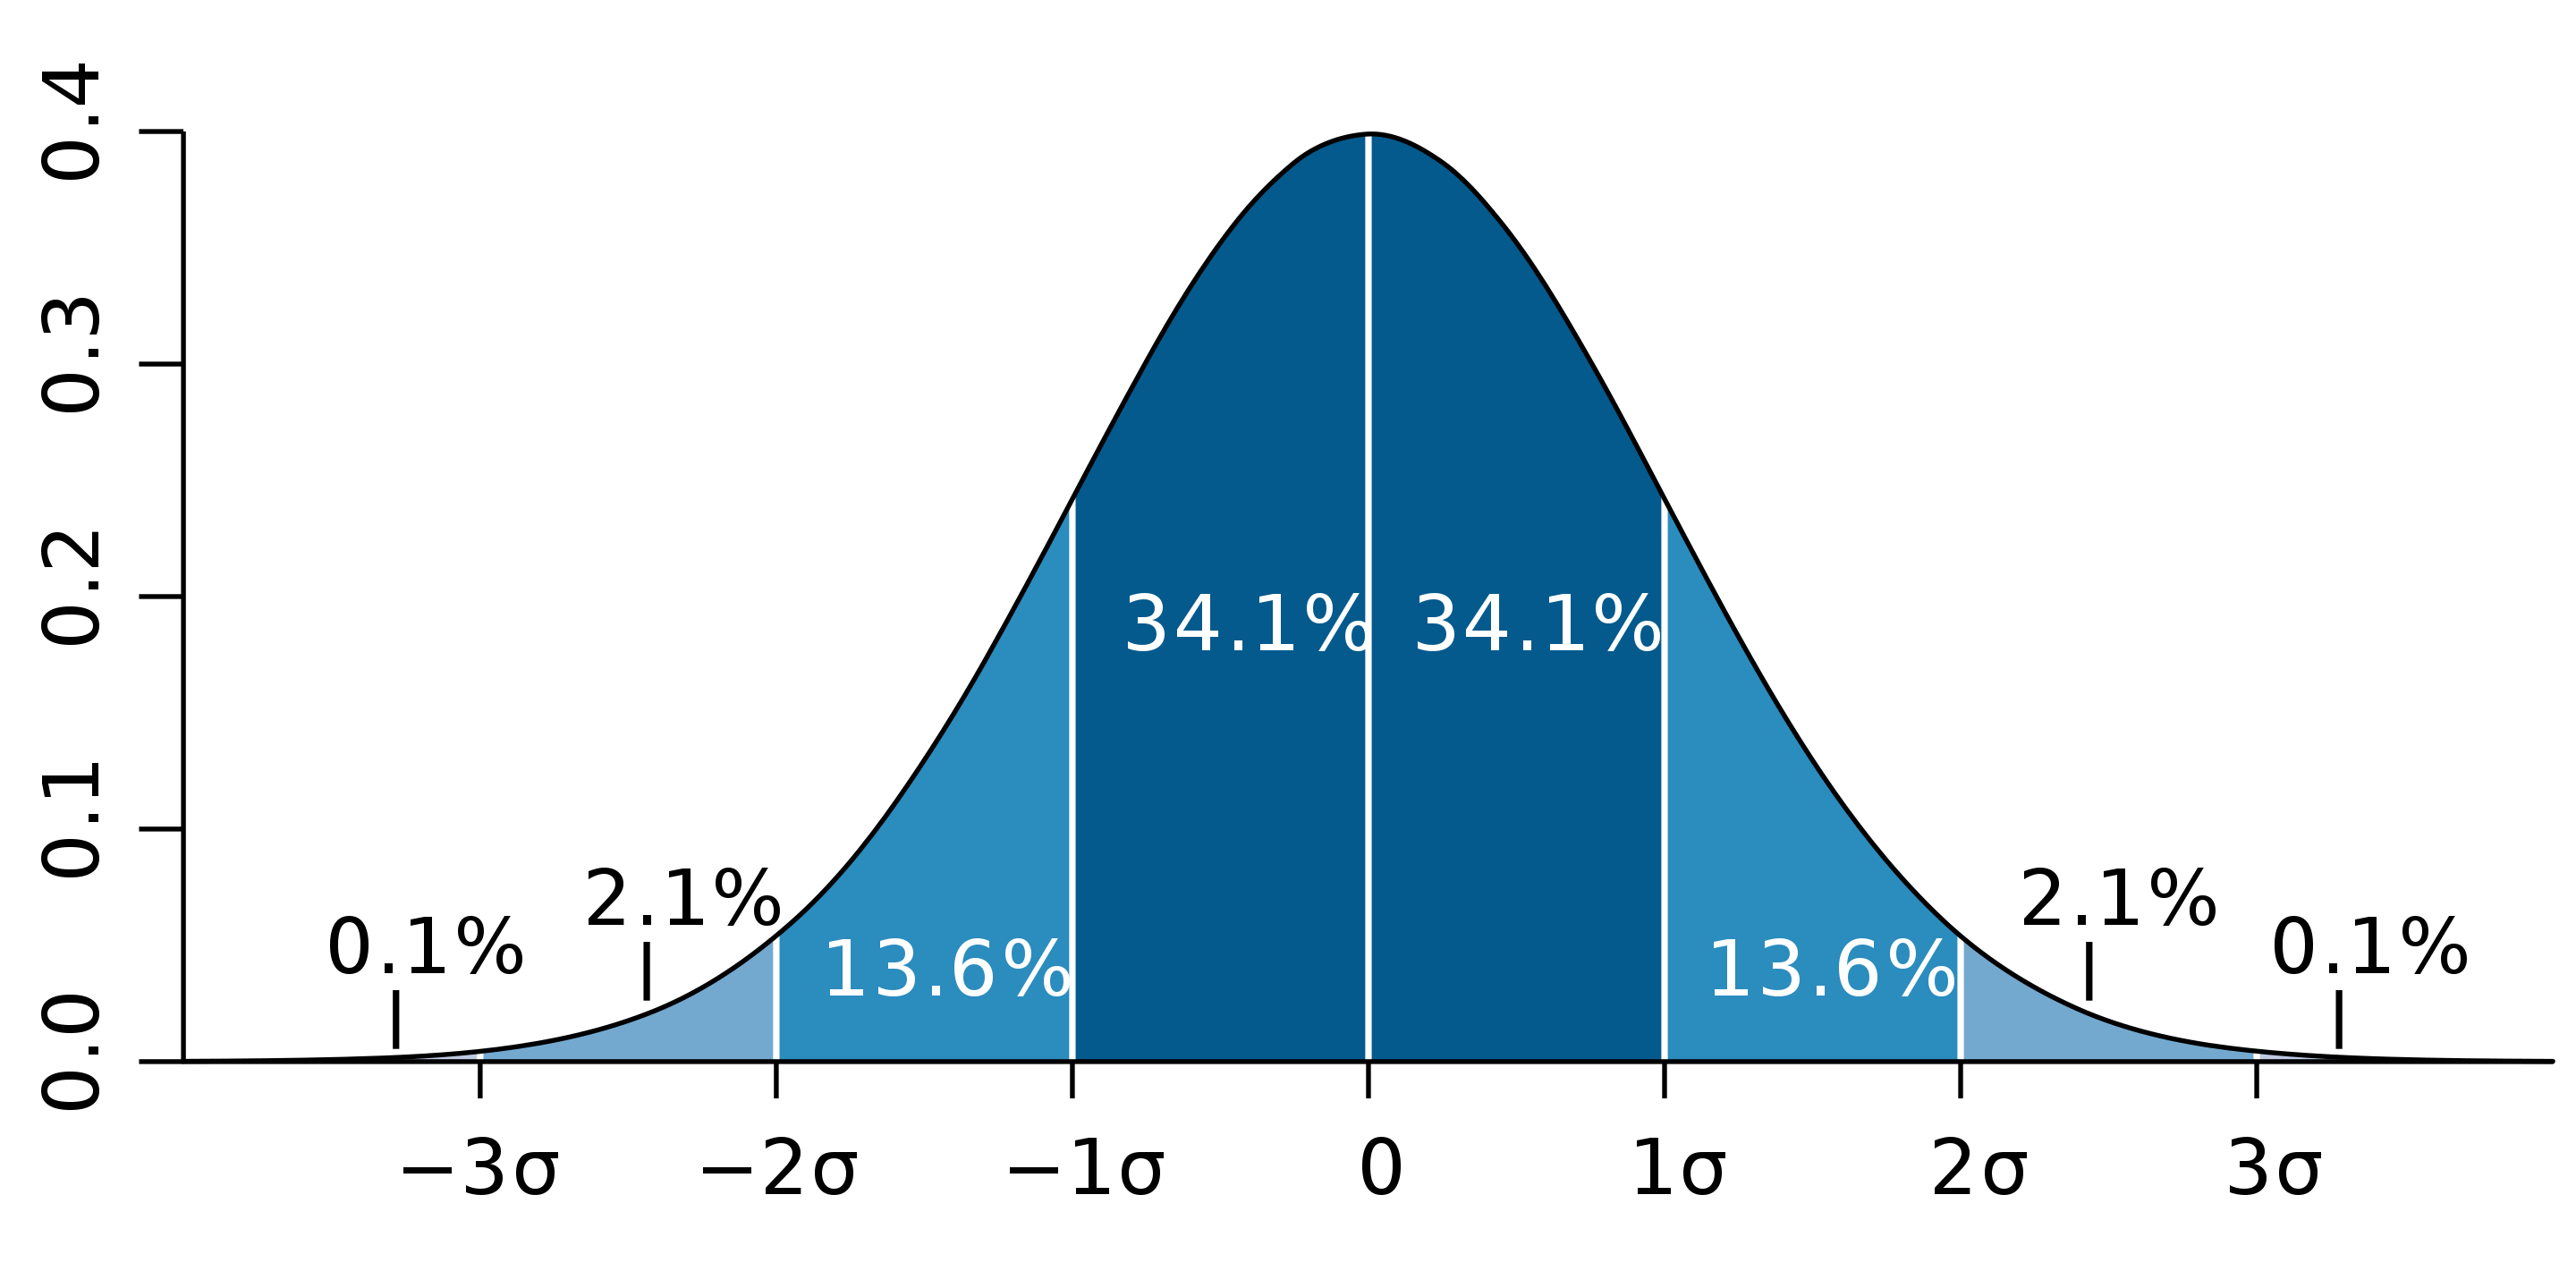

In [390]:
# 9. Load the bell curve image by concatentating it onto the base url
# and then displaying it:
Image("../images/bell-curve-standard-deviation.png")

In [391]:
# recalculate the deg_farh mean after adding 2 more 90's
mean_deg = round(np.mean(deg_fahr),1)
print('mean_deg:',mean_deg)

mean_deg: 80.4


In [392]:
# 10. Find the standard deviation of the temperature:
degs_std = round(np.std(deg_fahr),1)
print('degs_std:',degs_std) # 13.7

degs_std: 13.7


- The **standard deviation** of the **degrees** list is around 14 degrees
- The **mean degrees** is **79** ish
- 68.2% of all degrees are within 1 standard deviation of the **mean degrees**.
- Therefore, 68.2% of all degrees are in the 65 to 93 range

The **variance** is the square of **standard deviation**.  
The variance unit is **Sigma: σ2** (sigma squared)

In [393]:
# 11. Find the variance of the temperature:
degs_var = round(np.var(deg_fahr))
print('degs_var:',degs_var) # 188

degs_var: 188


**percentile** is the percent of values in a collection of numbers that are lower than a given number.
- **np.percentile(list,pct_cut_off)**

In [394]:
# call df.describe() for stats on numeric cols
# includes min, max, mean, std, pct (75,50,25)
car_df.describe()

,Sales_in_thousands,Price_in_thousands,Engine_size,Horsepower,Width,Length,Wheelbase,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_Performance
count,157.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,27.390755,3.060897,185.948718,71.150000,187.343590,107.487179,3.378026,17.951923,23.844156,77.043591
std,68.029422,14.351653,1.044653,56.700321,3.451872,13.431754,7.641303,0.630502,3.887921,4.282706,25.142664
min,0.110000,9.235000,1.000000,55.000000,62.600000,149.400000,92.600000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,18.017500,2.300000,149.500000,68.400000,177.575000,103.000000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,22.799000,3.000000,177.500000,70.550000,187.900000,107.000000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,31.947500,3.575000,215.000000,73.425000,196.125000,112.200000,3.799500,19.575000,26.000000,89.414878
max,540.561000,85.500000,8.000000,450.000000,79.900000,224.500000,138.700000,5.572000,32.000000,45.000000,188.144323


In [427]:
# get the std and 75th percentile for Horsepower col, 
# which should be 56.7 and 215, respectively:
hp_col = car_df['Horsepower']
print(type(hp_col))
print(hp_col[:5])
hp_std = round(np.std(hp_col),2)
print('hp_std:',hp_std)
deg_fahr_75_pct = np.percentile(deg_fahr,75)
print('deg_fahr_75_pct:',deg_fahr_75_pct)
hp_90_pct = np.percentile(list(hp_col),90)
print('hp_250_pct:',hp_90_pct)

<class 'pandas.core.series.Series'>
0    140.0
1    225.0
2    225.0
3    210.0
4    150.0
Name: Horsepower, dtype: float64
hp_std: 56.52
deg_fahr_75_pct: 90.0
hp_250_pct: nan


In [431]:
# horsepower percentile is nan cuz 'Horsepower' col is missing ONE value
# plug that missing row in horsepower col w median of the whole col
hp_med = int(car_df['Horsepower'].median())
print(hp_med)
car_df['Horsepower'].fillna(hp_med,inplace=True)

177


In [ ]:
car_df.isna().sum()

In [434]:
hp_90_pct = np.percentile(hp_col,90)
print('hp_250_pct:',hp_90_pct) # 253.8
# What that pct number means? If your car has 254 HP, it beats 90% of all the cars

hp_250_pct: 253.8


In [396]:
# get the degree number that 75% of all the degrees are less than

print('pctile_75:') # 90.0
# (so 75% of all the degrees are less than 90)

# get the degree number that 25% of all the degrees are less than]

print('pctile_25:') # 72.5

# get the degree number that 95% of all the degrees are less than]

print('pctile_95:') # 95.0

# get the degree number that 5% of all the degrees are less than]

print('pctile_5:') # 56.35

pctile_75:
pctile_25:
pctile_95:
pctile_5:


In [435]:
# Declare a list of people's ages:
ages = [5,31,43,48,50,41,7,11,15,39,80,82,32,2,8,6,25,36,27,61,31]

In [442]:
# 14. Make an input box for entering a percentile and getting back the age
#.    at which that percent of people are younger:
pctile_input = int(input("Enter Percentile, Get Age: "))
age_result = np.percentile(ages,pctile_input) 
print(f'{pctile_input}% of all ages are less than {age_result}')
# some values to try:
# input pct num, get age:
# 90% of all people are less than 61.0
# 80% of all people are less than 48.0
# 70% of all people are less than 41.0
# 40% of all people are less than 27.0
# 35% of all people are less than 25.0
# 30% of all people are less than 15.0
# 20% of all people are less than 8.0
# 10% of all people are less than 6.0

20% of all ages are less than 8.0


- **random.randint(min,max)** - gives one random integer in min-max range
- **random.sample(range(min,max),count)** - gives a list of unique min-max integers; list length = count

In [444]:
# small range to prove that max is inclusive
r = random.randint(1,5)
print('r:',r)

r: 5


In [445]:
import pprint as pp

In [468]:
# random sample: lottery ticket example: generate 10 lottery tix
# each lottery ticket is 5 unique ints from 1-69
# followed by a powerball number from 1-26
lottery_tickets = []
for n in range(10):
    lottery_ticket = random.sample(range(1,70),5)
    lottery_ticket.sort()
    powerball = random.randint(1,26)
    lottery_ticket.append(powerball)
    lottery_tickets.append(lottery_ticket)
    
pp.pprint(lottery_tickets)

[[3, 29, 49, 63, 65, 19],
 [13, 22, 31, 37, 51, 19],
 [2, 5, 51, 53, 66, 14],
 [6, 18, 24, 28, 56, 15],
 [1, 31, 32, 38, 43, 16],
 [25, 30, 57, 60, 63, 2],
 [25, 28, 40, 53, 64, 16],
 [9, 11, 20, 26, 38, 23],
 [13, 32, 37, 41, 54, 12],
 [4, 9, 30, 31, 49, 12]]


**for loop vs while loop**: when to use one or ther other
- **for loop** when you know the exact number of iterations (such as looping a range of numbers or a list)
- **while loop** when you do NOT know the exact number of iterations (such as going until you find something or meet some condition)

In [472]:
# while loop syntax: initial value in this case n
n = random.randint(1,10)
# condition, in this case, n is not equal to 5
# if this is true, loop runs
while n != 5:
    # what to do if condition is true
    print(f"{n} is not equal to 5")
    # new condition to evaluate before loop runs again
    n = random.randint(1,10)
    
print(f"While loop stopped, 'n' equals 5")

4 is not equal to 5
2 is not equal to 5
10 is not equal to 5
While loop stopped, 'n' equals 5


In [ ]:
# while loop instead of for loop example:
# use a while loop to generate lottery tickets, 
# stopping when you get a ticket where the Powerball number
# is equal to one of the 5 regular numbers

# always set up a while loop to run at least once
# this requires making the while condition true to start
powerball = 0
lottery_ticket = []
while powerball not in lottery_ticket:
    # generate a 5 num lottery ticket list
    lottery_ticket = random.sample(range(1,70),5)
    lottery_ticket.sort()
    powerball = random.randint(1,26)
    if powerball not in lottery_ticket:
        print(f'The powerball number, {powerball}, does not repeat any of the regular 5 lottery numbers:')
        print(lottery_ticket)
    else:
        print(f'The powerball number, {powerball}, is also found in the regular 5 lottery numbers')
        lottery_ticket.append(powerball)
    
print(lottery_ticket)

**numpy.random.uniform(min,max,sample_size)**

In [484]:
# 15. Make a uniform numpy array of 600 random floats between 0 and 6:
rand_600 = np.random.uniform(0,6,600)
print('rand_600[:60]:\n',rand_600[:60])

rand_600[:60]:
 [4.64060565 2.68185864 4.07546884 4.75145623 4.26779631 3.46759315
 0.18209269 2.87610803 4.46367001 0.96842866 0.07573435 0.84177311
 0.92918702 5.19300083 3.99903227 5.19084619 0.36184119 0.68363893
 2.09105928 1.07134212 5.66736769 4.15649093 0.04109535 3.68314593
 3.67241048 0.58439494 3.72866762 1.84239824 0.68443795 1.20577879
 4.47423089 3.207954   3.47697287 3.07931543 5.25517262 4.05349891
 1.23176256 4.65419572 5.23012131 1.02825132 0.50128793 4.8549377
 0.19532283 0.99085631 4.93971465 4.11547383 2.4179904  1.86650965
 0.96033552 3.53255882 1.17759278 2.1937473  3.53443598 1.20510578
 3.64211495 0.55274668 1.8639492  3.54719767 4.9844999  2.98386355]


**histogram** shows **frequency distribution** -- how many items fall within specified ranges.  

Each range, called a **bin**, is visualized as a column.

**uniform distribution** is when all values are more or less uniformly distributed, as by random.  
The greater the sample size, the more even the distribution.
**plt.hist(x,bins)**

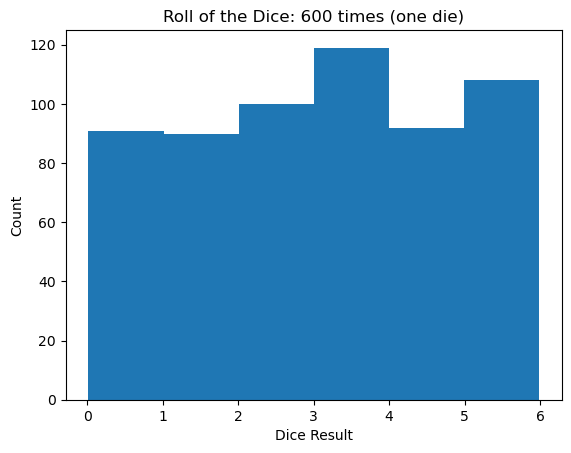

In [486]:
# 16. Make a histogram of the rand_floats. Since the values
#.    were generatead by random.uniform, there should be
#.    100 items, give or take, in each of 6 bins. However,
#.    due to the very small sample size, the bins will have
#.    very different heights:
plt.hist(x=rand_600,bins=6)
plt.title('Roll of the Dice: 600 times (one die)')
plt.xlabel('Dice Result')
plt.ylabel('Count')
plt.show()

In [487]:
# similar to above but without ranges -- just 600 ints from 1,6 at random
# then just bar chart
rand_600_ints = np.random.randint(1,7,600)
print(rand_600_ints[:30])

[4 4 1 1 1 5 4 3 2 1 5 4 3 1 1 6 5 3 5 2 4 6 5 1 5 5 5 1 6 4]


unique_values: [1 2 3 4 5 6]
value_counts: [102  94 103 102 101  98]


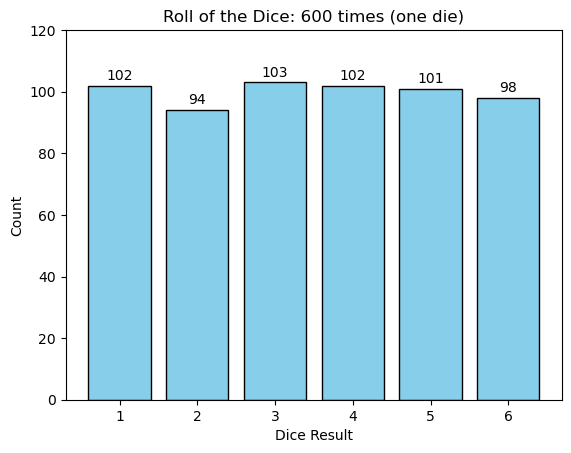

In [510]:
# plot the rolls of the dice as bars.. don't need histogram bins cuz these values are not ranges

# Count occurrences of each face
# unique_values, num_of_each = np.unique(list_of_nums, return_counts=True)
unique_values, value_counts = np.unique(rand_600_ints, return_counts=True)
print('unique_values:',unique_values) # [1 2 3 4 5 6]
print('value_counts:',value_counts) # [102  94 103 102 101  98]

# Plot bar chart
plt.bar(unique_values,value_counts,color='skyblue',edgecolor='black')

plt.title('Roll of the Dice: 600 times (one die)')
plt.xlabel('Dice Result')
plt.ylabel('Count')

# increase ylim to make room for bar number value labels
plt.ylim(0,120)

# add the values to each bar
# add vertical space to show the bar values
# use enumerate() to gain access to the index of each bar as you loop
for n in range(len(unique_values)):
  # print('value_counts[n]:',value_counts[n])
  # output text count label for each bar in x,y space
  plt.text(unique_values[n],value_counts[n]+2,str(value_counts[n]),ha='center')

# plt

In [511]:
# 17. Repeat the previous two steps, but this time with 60K items:
rand_600k_ints = np.random.randint(1,7,60_000)
print(rand_600k_ints[30_000:30_030])

[3 3 4 3 6 3 3 5 3 1 4 3 6 5 3 6 2 6 4 5 5 6 4 4 3 3 2 3 3 6]


unique_values: [1 2 3 4 5 6]
value_counts: [ 9858  9804 10046 10070 10181 10041]


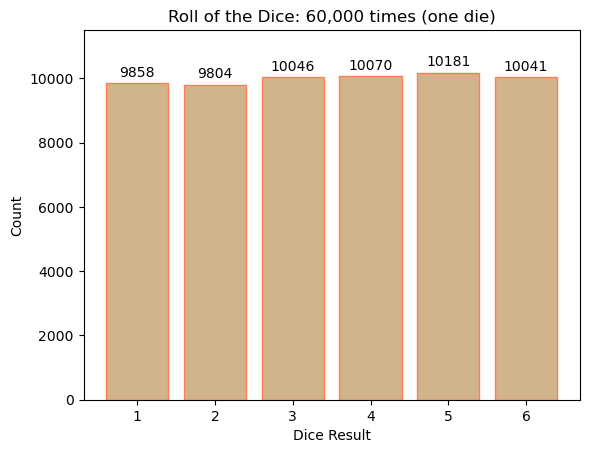

In [517]:
# get the unique values and values counts of the 60K items
unique_values, value_counts = np.unique(rand_600k_ints, return_counts=True)

print('unique_values:',unique_values) # [1 2 3 4 5 6]
print('value_counts:',value_counts) 
# [9858  9804 10046 10070 10181 10041]

# Plot bar chart
plt.bar(unique_values, value_counts,color='tan',edgecolor='coral')

plt.title('Roll of the Dice: 60,000 times (one die)')
plt.xlabel('Dice Result')
plt.ylabel('Count')

plt.ylim(0,11500)

# add the values to each bar
# add vertical space to show the bar values
# use enumerate() to gain access to the index of each bar as you loop
for n in range(6):
  # output text count label for each bar in x,y space
  plt.text(unique_values[n],
           value_counts[n]+200,
           str(value_counts[n]),
           ha='center')

plt.show()

- **normal distribution** is when values tend to cluster around the mean, as in a **bell curve**.
- **numpy.random.normal(mean, standard_deviation, number_of_values)**

[ 95.27980301 119.39454233 115.86840011 116.82984286  71.32141874
 131.57653416  88.83844671 110.14393908 111.03617316 106.14358111
 100.44203834  67.05204398 119.70865822  82.9048605  100.95209791
  94.08126989  73.60310913  96.15232387  97.02855851  76.05224878
 100.30832065  97.50283237  88.19651393  93.47318607  80.33403944
  76.25288218 109.73631879 110.81665847 105.26747274  97.97239253]


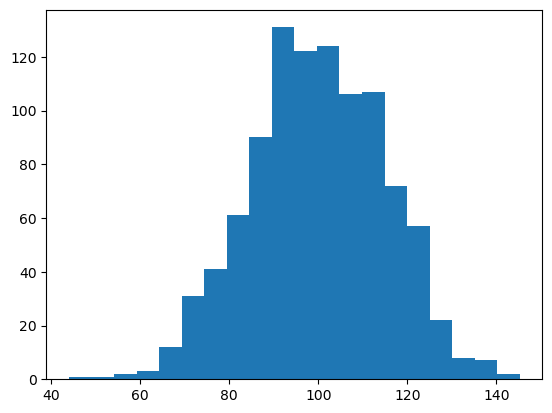

In [519]:
# 18. Make a normal distribution of 1,000 test scores that have an average value
#.    of 100 and a standard deviation of 15 (that is, 68.2% of values will be
#.    with in the 85-115 range). Plot the result as a histogram of 20 bins
test_scores_1000 = np.random.normal(100,15,1000)
print(test_scores_1000[:30])
plt.hist(x=test_scores_1000,bins=20)

# the result is a jaggy bell curve -- not enough bins and too small a sample size
plt.show()


min test score: 31
max test score: 167
82% percentile score: 113
98% percentile score: 130
99% percentile score: 134
99.99% percentile score: 155


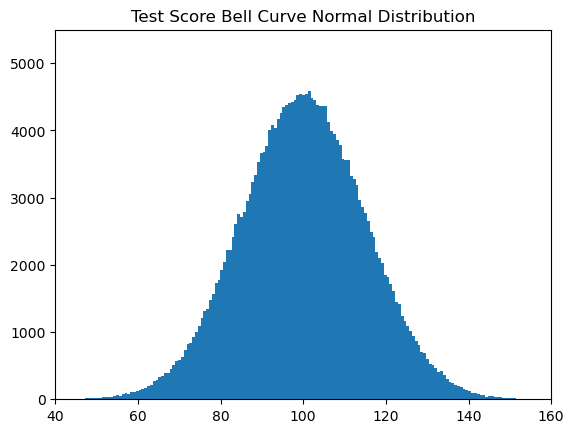

In [537]:
# 19. Plot a 250,000 with the same mean (100) and standard deviation (15).
#.    Increase bins to 200. The resulting bell curve will be much smoother:
test_scores_250k = np.random.normal(100,15,250_000)
plt.hist(test_scores_250k,bins=200)
plt.title("Test Score Bell Curve Normal Distribution")
plt.xlim(40,160)
plt.ylim(0,5500)
print('min test score:',round(min(test_scores_250k)))
print('max test score:',round(max(test_scores_250k)))
print('82% percentile score:',int(np.percentile(test_scores_250k,82)))
print('98% percentile score:',int(np.percentile(test_scores_250k,98)))
print('99% percentile score:',int(np.percentile(test_scores_250k,99)))
print('99.99% percentile score:',int(np.percentile(test_scores_250k,99.99)))

**regression** is used to *predict* the relationship between variables:  
in terms of **(x,y)** points: given just **x**, we may be able to predict **y** --  *if* we have some existing **(x,y)** points to study first.

**linear Regression** uses the relationship between known data-points to draw a straight line through all them.
- the **regression line**, also called the **best fit** line, minimizes the distance from the line to *all* points
- more specifically, the best fit line minimizes the **sum of the squares** of all the distances from the dots to the line, and is also called the **least squares line**

This line can be used to predict future values.

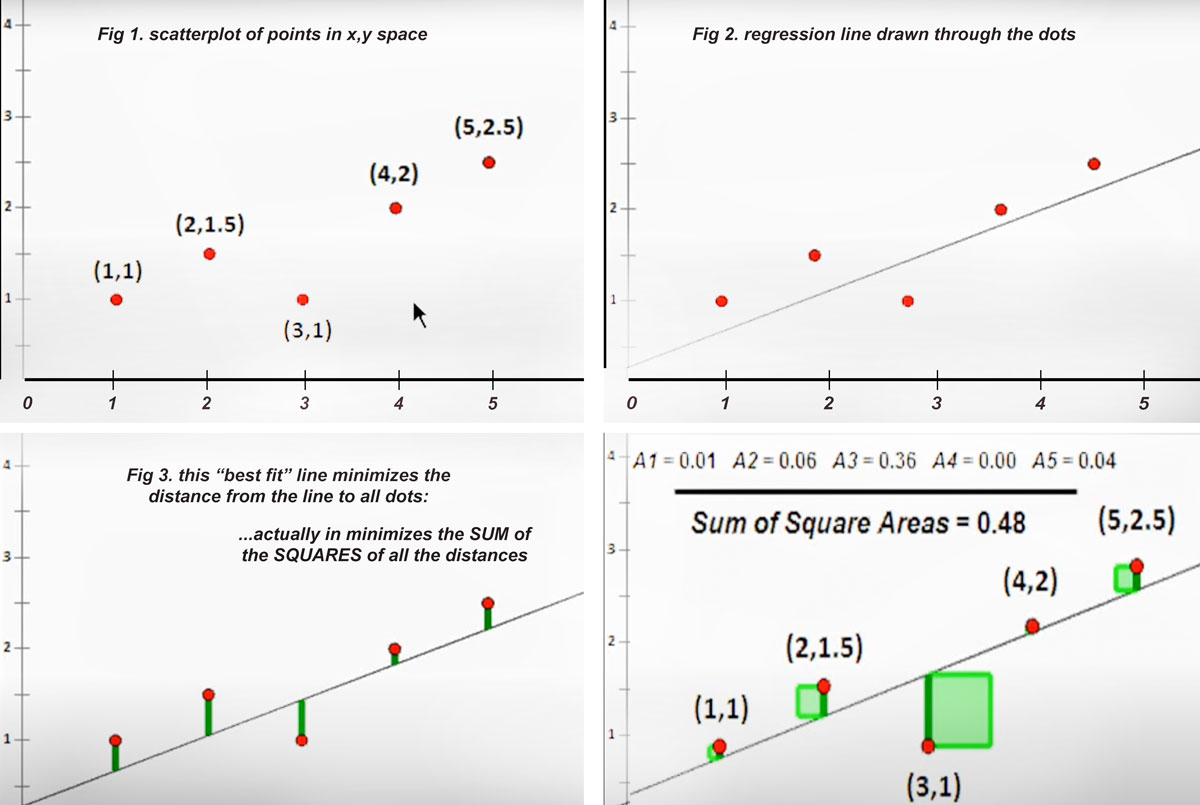

In [538]:
# 22. output the regression best fit line image:
# a 4-pack showing what the regression line is and and how it is drawn:
Image('../images/regression-best-fit-line.jpg')

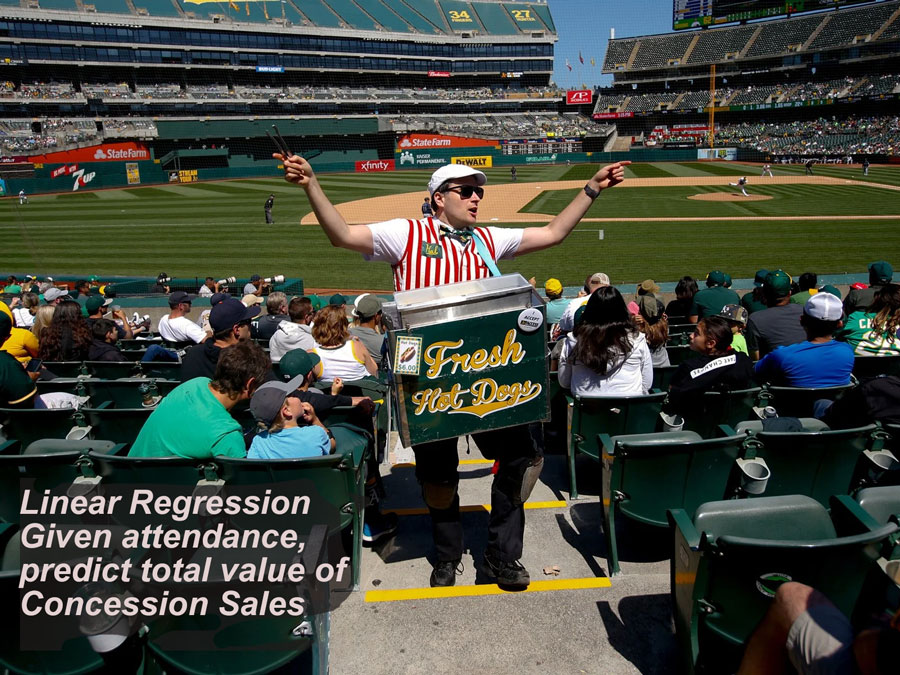

In [543]:
Image('../images/attendance-vs-concessions.jpg',width=400)

In [545]:
# 23. Make some x-y values of ballbame attendance and concession stand revenue
# in general, the greater the attendance, the greater the revenue, BUT
# how can we predict revenue given only an attendance number

attendance = [25678,22455,17796,18098,27029,22342,19453,32089,29089,31024,15190,32454,24033,26343]
attendance_arr = np.array(attendance)
# make sure the two lists have the same number of values -- a scatterplot requirement:

concessions = [750202,632144,593234,502243,730343,753433,534934,800242,779908,848403,430989,874977,629385,743086]
concessions_arr = np.array(concessions)

print(attendance_arr)
print(concessions_arr)
print(len(concessions_arr))

[25678 22455 17796 18098 27029 22342 19453 32089 29089 31024 15190 32454
 24033 26343]
[750202 632144 593234 502243 730343 753433 534934 800242 779908 848403
 430989 874977 629385 743086]
14


In [547]:
# challenge: make a 2-col dataframe using the 2 lists
attendance_concessions_df = pd.DataFrame()

In [548]:
attendance_concessions_df["Attendance"] = attendance
attendance_concessions_df["Concessions"] = concessions

In [ ]:
print(attendance_concessions_df.shape) # (14, 2)
attendance_concessions_df


- **vector operations** doing math between corresponding items in 2+ cols

In [553]:
# "Avg Sales" "Concessions" "Attendance"
#  add a new col: "Avg Sales" (rounded to int)
attendance_concessions_df["Per Person Sales"] = round(attendance_concessions_df["Concessions"] / attendance_concessions_df["Attendance"],2)

In [554]:
print(attendance_concessions_df.shape) # (14, 2)
attendance_concessions_df

(14, 3)


,Attendance,Concessions,Per Person Sales
0,25678,750202,29.22
1,22455,632144,28.15
2,17796,593234,33.34
3,18098,502243,27.75
4,27029,730343,27.02
5,22342,753433,33.72
6,19453,534934,27.50
7,32089,800242,24.94
8,29089,779908,26.81
9,31024,848403,27.35


**y = mx + b** is the formula for the slope of a line.
- if you have any 3 of the four values, you can solve for the missing one
- **y** is concessions revenue, which is what we want to predict for a given attendance (x value)
- so, we use the linregress method to get the slope and y-intercept,  
plug those into the formula along with x, and in that way solve for y

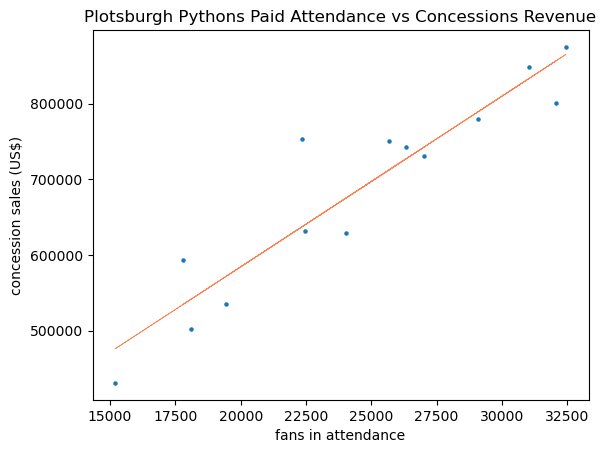

In [ ]:
# 24. plot attendance vs concessions as a scatterplot
#     and on top of that, add the regression line
x = attendance_arr
y = concessions_arr
plt.scatter(x,y,s=5)
plt.title("Plotsburgh Pythons Paid Attendance vs Concessions Revenue")
plt.xlabel('fans in attendance')
plt.ylabel('concession sales (US$)')

# we get a strong positive correlation between attendance and concessions revenue,
# as expected; next we'll draw a regression line through the dots
# m # m, b used for finding x or y
# in terms of the other via the famous equation y = mx + b
m, b = np.polyfit(x,y,1)
# drawing regression line requires numpy arrays for x values -- plain list won't work
plt.plot(x, m*x+b, color='coral', lw=0.5)

plt.show()

In [572]:
# predict concessions for 25000 attendance
# ${big_number:,.2f} converts to currency format, and adds comma(s) as needed
num_fans = int(input("Enter attendance, get predicted concessions revenue:"))
if(num_fans < 15000):
    print("Please enter a value between 15,000 and 35,000")
else:
    sales_rev = round(m * num_fans + b,2)
    print(f'Number of fans in attendance: {num_fans}\nEstimated concession sales: ${sales_rev:,.0f}')

Number of fans in attendance: 15678
Estimated concession sales: $486,989
